# Latent Space Visualization

Visualize the derived latent space on validation data. 

In [1]:
TITLES = ['single_scRNA_best_f1', 'single_cnn_best_f1', 'joint_cnn_best_f1']
MODEL_PATHS = ['../saved_models/10x_tune_single_scRNA_epoch_00150.pt', '../saved_models/10x_tune_single_cnn_epoch_00300.pt', '../saved_models/10x_tune_joint_cnn_epoch_00100.pt']


C:\Users\yanga\AppData\Local\Continuum\anaconda3\envs\tcr_update\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


{'seq_model_arch': 'None', 'seq_model_hyperparams': {'max_tcr_length': 47}, 'scRNA_model_arch': 'MLP', 'scRNA_model_hyperparams': {'activation': 'leakyrelu', 'batch_norm': True, 'dropout': 0.3, 'gene_hidden': [1250], 'output_activation': 'relu'}, 'zdim': 20, 'hdim': 400, 'activation': 'leakyrelu', 'dropout': 0.2, 'batch_norm': True, 'shared_hidden': [400]}


... storing 'dataset' as categorical
... storing 'binding_name' as categorical
C:\Users\yanga\AppData\Local\Continuum\anaconda3\envs\tcr_update\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


{'seq_model_arch': 'CNN', 'seq_model_hyperparams': {'num_features_1': 30, 'num_features_2': 50, 'num_features_3': 150, 'dropout': 0.0, 'batch_norm': True, 'embedding_dim': 50, 'encoder': {'kernel_1': 5, 'kernel_23': 5, 'stride_1': 3, 'stride_23': 3, 'num_layers': None, 'activation': 'leakyrelu', 'kernel': [5, 5, 5], 'stride': [3, 3, 3], 'num_features': [30, 50, 150], 'dropout': 0.0, 'batch_norm': True, 'embedding_dim': 50}, 'decoder': {'kernel_1': 3, 'kernel_2': 3, 'stride_1': 2, 'stride_2': 2, 'initial_feature': 150, 'initial_len': 7, 'num_layers': None, 'activation': 'relu', 'kernel': [3, 3], 'stride': [2, 2], 'num_features': [150, 150, 50], 'dropout': 0.0, 'batch_norm': True, 'embedding_dim': 50}, 'num_features': [30, 50, 150], 'max_tcr_length': 47}, 'scRNA_model_arch': 'None', 'scRNA_model_hyperparams': {}, 'zdim': 160, 'hdim': 1000, 'activation': 'leakyrelu', 'dropout': 0.15000000000000002, 'batch_norm': True, 'shared_hidden': [500]}


... storing 'dataset' as categorical
... storing 'binding_name' as categorical
C:\Users\yanga\AppData\Local\Continuum\anaconda3\envs\tcr_update\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


{'seq_model_arch': 'CNN', 'seq_model_hyperparams': {'num_features_1': 40, 'num_features_2': 75, 'num_features_3': 200, 'dropout': 0.05, 'batch_norm': False, 'embedding_dim': 30, 'encoder': {'kernel_1': 4, 'kernel_23': 4, 'stride_1': 3, 'stride_23': 3, 'num_layers': None, 'activation': 'leakyrelu', 'kernel': [4, 4, 4], 'stride': [3, 3, 3], 'num_features': [40, 75, 200], 'dropout': 0.05, 'batch_norm': False, 'embedding_dim': 30}, 'decoder': {'kernel_1': 3, 'kernel_2': 5, 'stride_1': 3, 'stride_2': 2, 'initial_feature': 150, 'initial_len': 7, 'num_layers': None, 'activation': 'relu', 'kernel': [3, 5], 'stride': [3, 2], 'num_features': [150, 200, 75], 'dropout': 0.05, 'batch_norm': False, 'embedding_dim': 30}, 'num_features': [40, 75, 200], 'max_tcr_length': 47}, 'scRNA_model_arch': 'MLP', 'scRNA_model_hyperparams': {'activation': 'leakyrelu', 'batch_norm': True, 'dropout': 0.05, 'gene_hidden': [1750], 'output_activation': 'relu'}, 'zdim': 180, 'hdim': 300, 'activation': 'leakyrelu', 'drop

... storing 'dataset' as categorical
... storing 'binding_name' as categorical


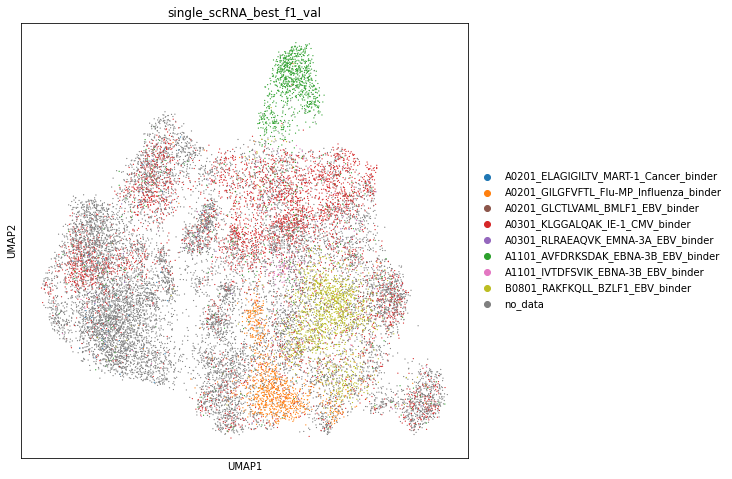

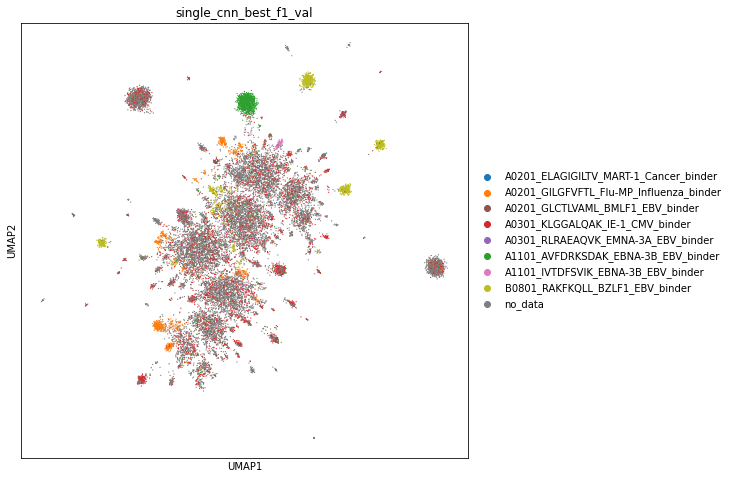

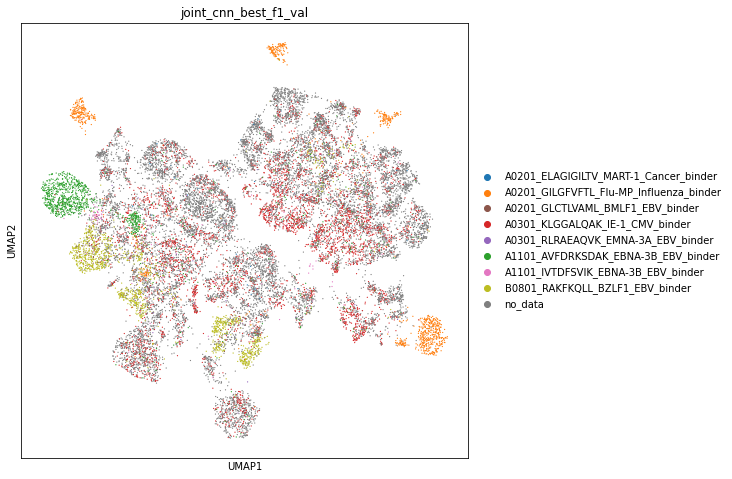

In [15]:
import sys
sys.path.insert(0, '..')
import tcr_embedding as tcr
import scanpy as sc
import json
from matplotlib import rcParams
import torch
for TITLE, MODEL_PATH in zip(TITLES, MODEL_PATHS):
    path_data = '../data/10x_CD8TC/v5_train_val_test.h5ad'
    data_full = sc.read_h5ad(path_data)
    data_full = data_full[data_full.obs['set'] != 'test']

    high_antigen_count = ['A0201_ELAGIGILTV_MART-1_Cancer_binder',
                            'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
                            'A0201_GLCTLVAML_BMLF1_EBV_binder',
                            'A0301_KLGGALQAK_IE-1_CMV_binder',
                            'A0301_RLRAEAQVK_EMNA-3A_EBV_binder',
                            'A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
                            'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder',
                            'B0801_RAKFKQLL_BZLF1_EBV_binder']

    data_full.obs['binding_name'][~data_full.obs['binding_name'].isin(high_antigen_count)] = 'no_data'

    data_train = data_full[data_full.obs['set'] == 'train']
    data_train.obs['binding_name'][~data_train.obs['binding_name'].isin(high_antigen_count)] = 'no_data'
    data_val = data_full[data_full.obs['set'] == 'val']
    data_val.obs['binding_name'][~data_val.obs['binding_name'].isin(high_antigen_count)] = 'no_data'

    data_val.obs['binding_name'].unique()
    data_train.obs['binding_name'] = data_train.obs['binding_name'].astype(str)
    data_val.obs['binding_name'] = data_val.obs['binding_name'].astype(str)

    model_file = torch.load(MODEL_PATH)
    # params['scRNA_model_hyperparams']['gene_hidden'] = [params['scRNA_model_hyperparams']['gene_hidden']]
    # params['shared_hidden'] = [params['shared_hidden']]

    params = model_file['params']
    print(params)
    
    if 'single' in MODEL_PATH:
        trained_model = tcr.models.single_model.SingleModel(
                adatas=[data_full],  # adatas containing gene expression and TCR-seq
                names=['10x'],
                aa_to_id=data_full.uns['aa_to_id'],  # dict {aa_char: id}
                seq_model_arch=params['seq_model_arch'],  # seq model architecture
                seq_model_hyperparams=params['seq_model_hyperparams'],  # dict of seq model hyperparameters
                scRNA_model_arch=params['scRNA_model_arch'],
                scRNA_model_hyperparams=params['scRNA_model_hyperparams'],
                zdim=params['zdim'],  # zdim
                hdim=params['hdim'],  # hidden dimension of scRNA and seq encoders
                activation=params['activation'],  # activation function of autoencoder hidden layers
                dropout=params['dropout'],
                batch_norm=params['batch_norm'],
                shared_hidden=params['shared_hidden'],  # hidden layers of shared encoder / decoder
                gene_layers=[],  # [] or list of str for layer keys of each dataset
                seq_keys=[]  # [] or list of str for seq keys of each dataset
            )
        
    else:
        trained_model = tcr.models.joint_model.JointModel(
                adatas=[data_full],  # adatas containing gene expression and TCR-seq
                names=['10x'],
                aa_to_id=data_full.uns['aa_to_id'],  # dict {aa_char: id}
                seq_model_arch=params['seq_model_arch'],  # seq model architecture
                seq_model_hyperparams=params['seq_model_hyperparams'],  # dict of seq model hyperparameters
                scRNA_model_arch=params['scRNA_model_arch'],
                scRNA_model_hyperparams=params['scRNA_model_hyperparams'],
                zdim=params['zdim'],  # zdim
                hdim=params['hdim'],  # hidden dimension of scRNA and seq encoders
                activation=params['activation'],  # activation function of autoencoder hidden layers
                dropout=params['dropout'],
                batch_norm=params['batch_norm'],
                shared_hidden=params['shared_hidden'],  # hidden layers of shared encoder / decoder
                gene_layers=[],  # [] or list of str for layer keys of each dataset
                seq_keys=[]  # [] or list of str for seq keys of each dataset
            )
    trained_model.load(MODEL_PATH)

    trained_model.model

    def annotated_latent_space(adata):
        latent = trained_model.get_latent([adata], batch_size=256, device='cuda')
        latent.obs['binding_name'] = adata.obs['binding_name'].values
        latent.obs['clonotype'] = adata.obs['clonotype'].values
        latent.obs['donor'] = adata.obs['donor'].values
        return latent

    def plot_umap(adata, dset=''):
        rcParams['figure.figsize'] = (8, 8)
        sc.pp.neighbors(adata, use_rep='X')
        sc.tl.umap(adata)
#         ax = sc.pl.umap(adata, color='donor', title=TITLE+'_'+dset, return_fig=True)
#         ax.savefig(TITLE+'_'+dset+'_donor.pdf', bbox_inches='tight')
#         ax = sc.pl.umap(adata, color='clonotype', title=TITLE+'_'+dset, return_fig=True)
#         ax.savefig(TITLE+'_'+dset+'_clonotype.pdf', bbox_inches='tight')

#         sc.pl.umap(adata, color='binding_name', groups=high_antigen_count, title=TITLE+'_'+dset, return_fig=True)
        ax = sc.pl.umap(adata, color='binding_name', groups=high_antigen_count + ['no_data'], palette=['tab:blue', 'tab:orange', 'tab:brown','tab:red', 'tab:purple', 'tab:green', 'tab:pink', 'tab:olive', 'tab:gray', 'orange'], title=TITLE+'_'+dset, return_fig=True)
        ax.savefig(TITLE+'_'+dset+'_antigen.pdf', bbox_inches='tight')

    latent_val = annotated_latent_space(data_val)
    plot_umap(latent_val, dset='val')

#     latent_train = annotated_latent_space(data_train)
#     plot_umap(latent_train, dset='train')

    # latent_full = annotated_latent_space(data_full)
    # plot_umap(latent_full)

In [10]:
data_full.obs['binding_name'].astype(str)

AAACGGGTCGGACAAG-1-donor_1    no_data
AAAGATGGTACAGACG-1-donor_1    no_data
AAAGTAGAGACGCTTT-1-donor_1    no_data
AAAGTAGAGCGCTTAT-1-donor_1    no_data
AAAGTAGAGTTACGGG-1-donor_1    no_data
                               ...   
TTTGTCAGTACCCAAT-8-donor_4    no_data
TTTGTCAGTCTAAACC-8-donor_4    no_data
TTTGTCAGTCTCTCGT-8-donor_4    no_data
TTTGTCATCCCACTTG-8-donor_4    no_data
TTTGTCATCTCTAAGG-8-donor_4    no_data
Name: binding_name, Length: 107629, dtype: object